# 決定木の訓練と可視化

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
from sklearn.tree import export_graphviz
import os
from sklearn.externals.six import StringIO

dot_data = StringIO()

export_graphviz(
    tree_clf,
    out_file=dot_data,#os.path.join("images", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

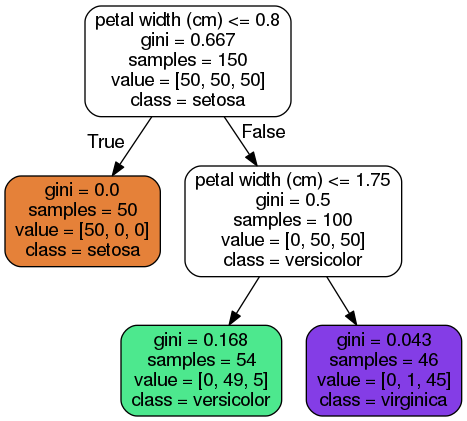

In [14]:
import pydotplus
from IPython.display import Image

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# クラスの確率の推計

In [18]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [19]:
tree_clf.predict([[5, 1.5]])

array([1])

# ジニ不純度かエントロピーか

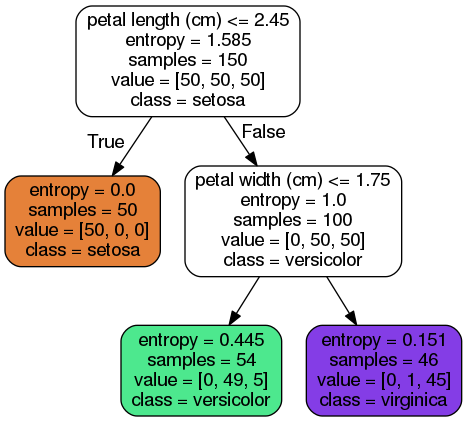

In [22]:
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)
tree_clf.fit(X, y)

dot_data = StringIO()

export_graphviz(
    tree_clf,
    out_file=dot_data,#os.path.join("images", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# 正則化ハイパーパラメータ

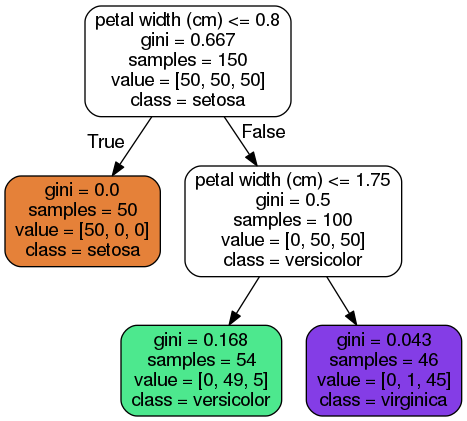

In [28]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes=3)
tree_clf.fit(X, y)

dot_data = StringIO()

export_graphviz(
    tree_clf,
    out_file=dot_data,#os.path.join("images", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

# 回帰

In [29]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

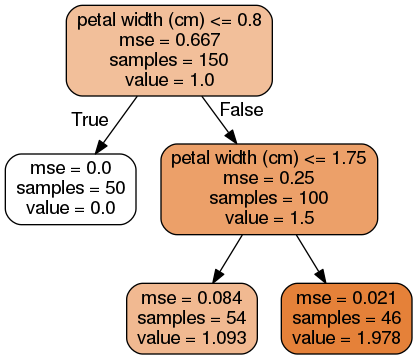

In [31]:
dot_data = StringIO()

export_graphviz(
    tree_reg,
    out_file=dot_data,#os.path.join("images", "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())